1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number 3. a. Use elbow method as baseline 3. b. Apply other methods to compare with elbow
4. Use Pipeline 4. a. Use scaler and dimensional reduction (if it is necessary). 4. b. Use suitable clustering model for this problem.
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)

How can I measure your point:

1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.


# Load Dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Clustered_Customer_Data.csv").drop(columns=["Unnamed: 0"])

In [3]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Data Analysis


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


Kiểm tra dataset có giá trị null hay không. Đồng thời xem kiểu dữ liêu của từng feature


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

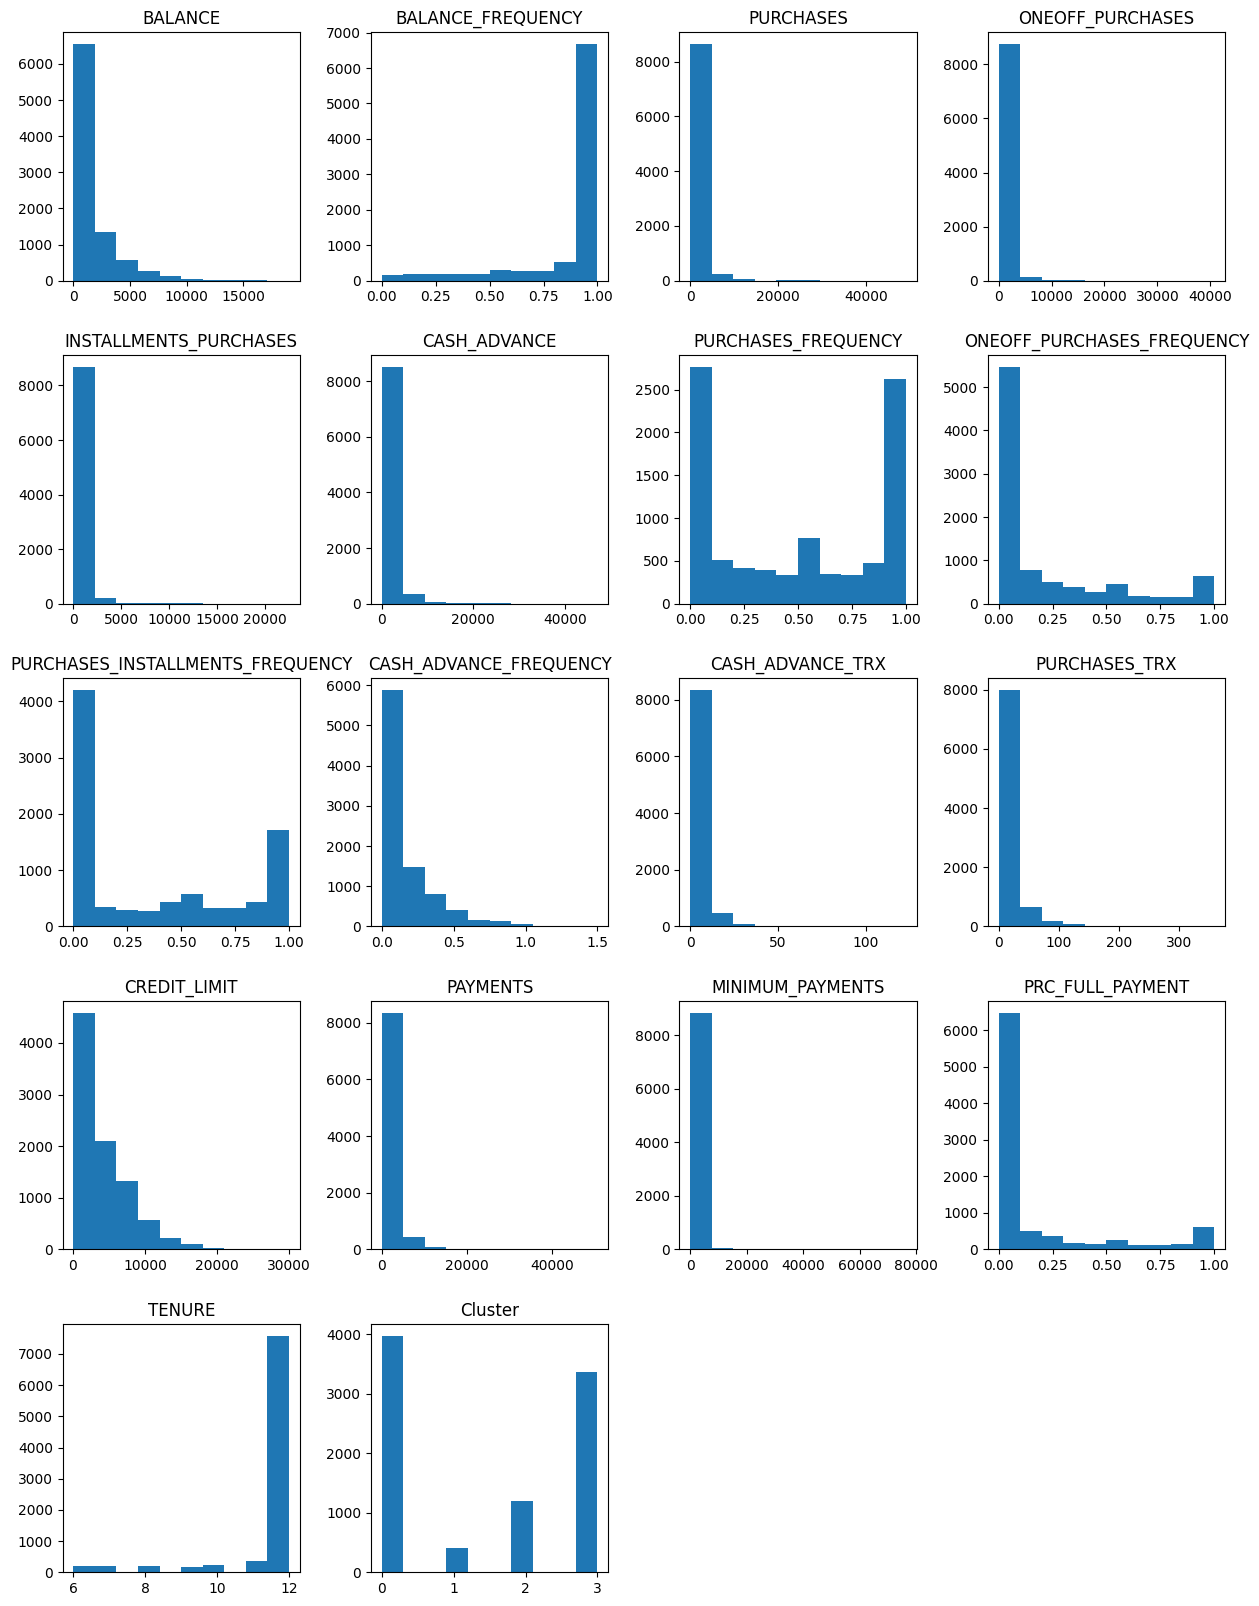

In [6]:
df.hist(figsize=(15, 20), grid=False)
plt.show()

# Data Preprocessing


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

Trong dataset có tồn tại một feature tên là Cluster, ta giả sử feature này là labels và không đóng góp gì trong quá trình clustering dữ liệu


In [8]:
cluster_result = df["Cluster"]
data = df.drop(columns=["Cluster"])

## Tiến hành chuẩn hóa dữ liệu bằng class StandardScaler


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## Xóa đi các data sample được cho là outliers bằng phương pháp Z-Score


In [10]:
data_no_outliers = data[(np.abs(stats.zscore(scaled_data)) < 3).all(axis=1)]
print(f"Shape of data with outliers: {data.shape}")
print(f"Shape of data without outliers: {data_no_outliers.shape}")

Shape of data with outliers: (8950, 17)
Shape of data without outliers: (7434, 17)


# Feature Engineering


## Giảm chiều dữ liệu bằng PCA


In ra các giá trị variance ứng với từng components


In [11]:
pca = PCA(n_components=len(data.columns))
pca_result = pca.fit_transform(data_no_outliers)

In [12]:
np.round(pca.explained_variance_ratio_ * 100, decimals=4)

array([5.71601e+01, 1.59412e+01, 1.29600e+01, 7.01360e+00, 3.52530e+00,
       1.90960e+00, 1.48940e+00, 5.00000e-04, 1.00000e-04, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00])

Ta chỉ chọn số component giữ lại cho ta một threshold (thường là 0.95, 0.98 hoặc 0.99) phần trăm thông tin. Threshold càng lớn thì ta giữ lại thông tin của dữ liệu càng nhiều. Ở trường hợp này ta chọn threshold = 0.98


In [13]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.98

n_components = np.argmax(explained_variance_ratio >= threshold) + 1
print(f"Number of components to explain {threshold * 100}% variance: {n_components}")

Number of components to explain 98.0% variance: 6


In [14]:
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data_no_outliers)

In [15]:
cleaned_data = pd.DataFrame(
    reduced_data, columns=[f"PC{i+1}" for i in range(n_components)]
)
cleaned_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3543.061152,-498.263012,-432.706741,-169.969046,-13.777979,-113.222734
1,4503.407560,4493.388363,272.250168,-3475.071101,1475.599731,442.771007
2,3334.004282,-821.357184,-1334.513920,959.589754,-238.158738,-536.029516
3,3181.058207,-1522.200832,-1045.366370,1222.575674,777.292937,-36.569288
4,-3063.311303,119.714304,-311.474499,35.592697,-384.789606,-412.393153


# Model Part


In [17]:
import pickle
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [18]:
data = cleaned_data.copy()

## Ta sẽ dùng Elbow Method để tìm xem đâu là giá trị k phù hợp nhất cho thuật toán K-Means


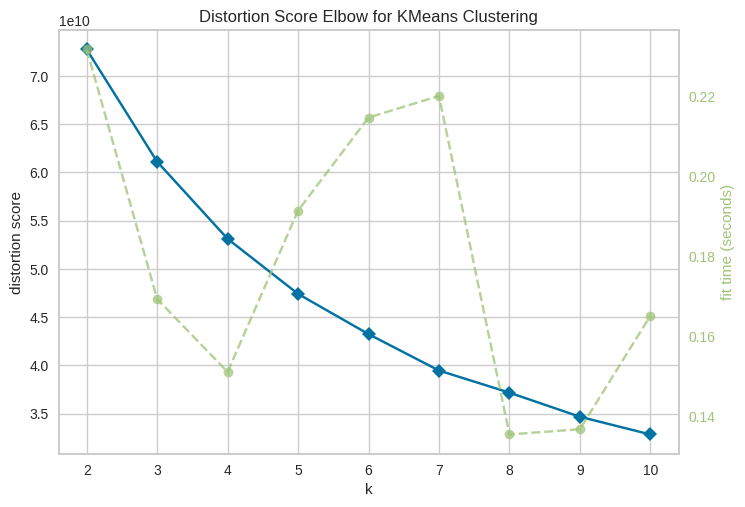

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
default_elbow_method = KElbowVisualizer(
    KMeans(random_state=21110308), k=(2, 11), locate_elbow=False
)
default_elbow_method.fit(data)
default_elbow_method.show()

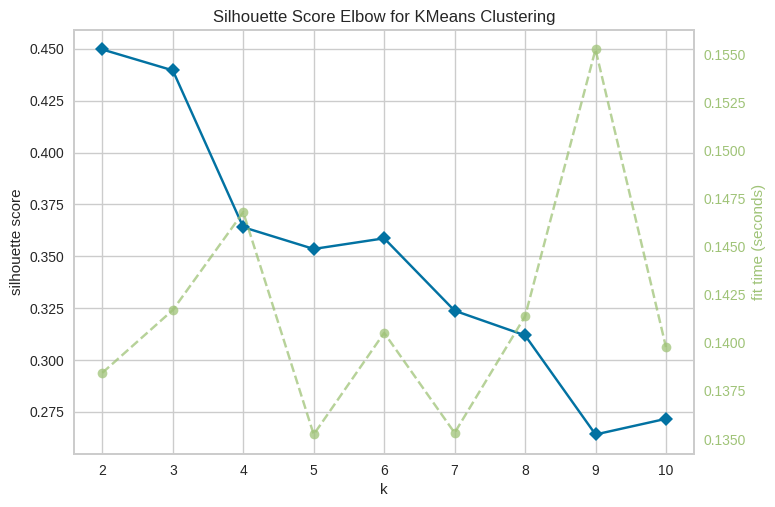

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
silhouette_elbow_method = KElbowVisualizer(
    KMeans(random_state=21110308), k=(2, 11), metric="silhouette", locate_elbow=False
)
silhouette_elbow_method.fit(data)
silhouette_elbow_method.show()

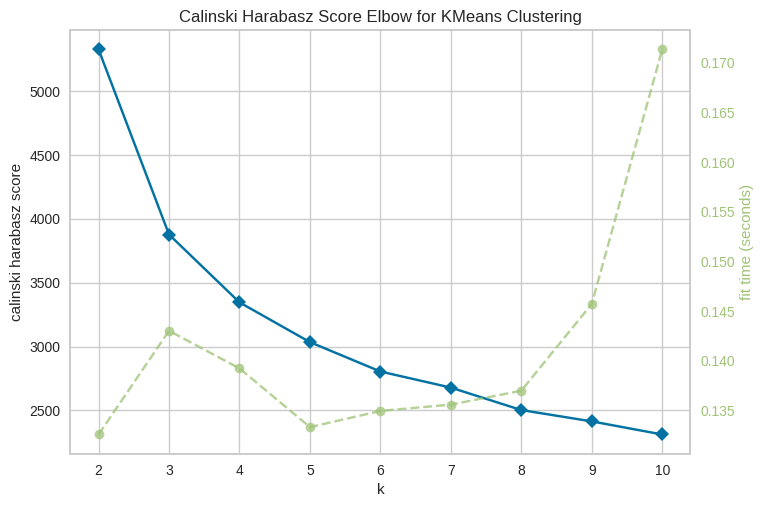

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [21]:
calinski_harabasz_elbow_method = KElbowVisualizer(
    KMeans(random_state=21110308),
    k=(2, 11),
    metric="calinski_harabasz",
    locate_elbow=False,
)
calinski_harabasz_elbow_method.fit(data)
calinski_harabasz_elbow_method.show()

Dựa vào Elbow Visualizer, ta sẽ chọn $k = 4$ cho K-Means


In [22]:
best_k = 4
print(f"Best K: {best_k}")

Best K: 4


## Khởi tạo class K-Means và tiến hành fitting dữ liệu


In [23]:
kmeans_model = KMeans(n_clusters=best_k, random_state=21110308)
kmeans_model.fit(data)

KMeans(n_clusters=4, random_state=21110308)

In ra label của từng data sample


In [24]:
labels = kmeans_model.labels_
labels

array([0, 3, 2, ..., 0, 0, 0], dtype=int32)

In ra tâm của từng cluster


In [25]:
centroids = kmeans_model.cluster_centers_
centroids

array([[-2148.85569247,    95.76175725,   -55.7017688 ,    16.91724826,
          -16.60440539,    -8.99532516],
       [ 6535.6990411 , -1651.56460216,  -124.59708986,    63.37473328,
         -151.75245067,   -20.45425774],
       [ 1501.61594305, -1253.98531904,   370.45506277,    29.19883295,
           48.56438371,    20.3424205 ],
       [ 3389.66156483,  2877.08126174,  -300.00270704,  -177.40253298,
           98.08730933,    21.75846911]])

Lưu trữ mô hình K-Means vừa train bằng thư viện pickle


In [26]:
saved_model_filename = "kmeans_model.sav"
pickle.dump(kmeans_model, open(saved_model_filename, "wb"))

## Tiến hành trực quan kết quả của quá trình clustering


In [27]:
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

Với 2 components (2D)


In [28]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(data), columns=["PC1", "PC2"])
pca_df["Cluster"] = labels
pca_df.head()

,PC1,PC2,Cluster
0,-3543.061152,-498.263012,0
1,4503.407560,4493.388363,3
2,3334.004282,-821.357184,2
3,3181.058207,-1522.200832,2
4,-3063.311303,119.714304,0


In [29]:
centroids_pca = pca.transform(centroids)

In [ ]:
fig = px.scatter(
    pca_df,
    x="PC1",
    y="PC2",
    color="Cluster",
    title="K-Means Clustering Results (2D)",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.add_trace(
    go.Scatter(
        x=centroids_pca[:, 0],
        y=centroids_pca[:, 1],
        mode="markers",
        marker=dict(size=10, color="Black", symbol="x"),
        name="Centers",
    )
)

fig.update_layout(width=800, height=600)
fig.show()

Với 3 components (3D)


In [31]:
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(data), columns=["PC1", "PC2", "PC3"])
pca_df["Cluster"] = labels
pca_df.head()

centroids_pca = pca.transform(centroids)

fig = px.scatter_3d(
    pca_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Cluster",
    title="K-Means Clustering Results (3D)",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.add_trace(
    go.Scatter3d(
        x=centroids_pca[:, 0],
        y=centroids_pca[:, 1],
        z=centroids_pca[:, 2],
        mode="markers",
        marker=dict(size=10, color="Black", symbol="x"),
        name="Centers",
    )
)
fig.update_layout(width=800, height=600)
fig.show()

## Sau khi đã thử nghiệm các bước của quá trình Training, ta khởi tạo Pipeline dựa trên những gì đã researching


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

Xây dựng class cho việc xóa đi các outliers bằng phương pháp Z-Score


In [33]:
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, threshold: float = 3):
        self.threshold = threshold

    def fit(self, X):
        z_scores = stats.zscore(X)
        self.mask = (np.abs(z_scores) < self.threshold).all(axis=1)
        return self

    def transform(self, X):
        return X[self.mask]

Xây dựng class PCA với công dựng giữ lại số lượng thông tin Threshold


In [34]:
class PCA_Threshold(BaseEstimator, TransformerMixin):
    def __init__(self, threshold: float = 0.95):
        self.threshold = threshold

    def fit(self, X):
        pca = PCA()
        pca.fit(X)

        explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
        self.n_components = np.argmax(explained_variance_ratio >= self.threshold) + 1
        return self

    def transform(self, X):
        pca = PCA(n_components=self.n_components)
        return pca.fit_transform(X)

Khởi tạo Pipeline


In [35]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("remove_outliers", RemoveOutliers(threshold=3)),
        ("pca", PCA_Threshold(threshold=0.95)),
        ("kmeans", KMeans(n_clusters=best_k)),
    ]
)

Tiến hành training bằng Pipeline


In [36]:
pipeline.fit_transform(data)

array([[2.76153431, 2.18604923, 0.61437738, 2.26243236],
       [1.76840314, 2.00000689, 2.41058769, 2.65067808],
       [2.52757908, 2.05122097, 2.6174185 , 2.23001961],
       ...,
       [2.51810251, 2.5417606 , 0.9438489 , 2.40884688],
       [2.77947607, 2.206437  , 0.67120225, 2.03324345],
       [2.71968064, 2.50785074, 0.71440199, 2.2897396 ]])

Trực quan hóa lại kết quả một lần nữa


In [37]:
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(data), columns=["PC1", "PC2", "PC3"])
pca_df["Cluster"] = labels

centroids_pca = pca.transform(centroids)

fig = px.scatter_3d(
    pca_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Cluster",
    title="K-Means Clustering Results (3D)",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.add_trace(
    go.Scatter3d(
        x=centroids_pca[:, 0],
        y=centroids_pca[:, 1],
        z=centroids_pca[:, 2],
        mode="markers",
        marker=dict(size=10, color="Black", symbol="x"),
        name="Centers",
    )
)
fig.update_layout(width=800, height=600)
fig.show()

## Dùng các metric để đo performance của quá trình clustering


In [38]:
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

In [39]:
# Calculate clustering metrics
silhouette = silhouette_score(data, labels)
db_index = davies_bouldin_score(data, labels)
ch_index = calinski_harabasz_score(data, labels)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.36
Davies-Bouldin Index: 1.30
Calinski-Harabasz Index: 3345.66


# Discussion & Conclusion


Trực quan hóa kết quả cluster ban đầu của dữ liệu


In [40]:
cluster_result = df["Cluster"]
data = df.drop(columns=["Cluster"])

pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(data), columns=["PC1", "PC2", "PC3"])

fig = px.scatter_3d(
    pca_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color=cluster_result,
    title="K-Means Clustering Results (3D)",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)
fig.update_layout(width=800, height=600)
fig.show()

In [41]:
cluster_result = df["Cluster"]
data = df.drop(columns=["Cluster"])

pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(data), columns=["PC1", "PC2"])

fig = px.scatter(
    pca_df,
    x="PC1",
    y="PC2",
    color=cluster_result,
    title="K-Means Clustering Results (2D)",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)
fig.update_layout(width=800, height=600)
fig.show()

## Conclusion:


Với hình ảnh của dữ liệu từ feature cluster ban đầu và được clustering bằng thụât toán K-Means thì dữ liệu thông qua quá trình clustering bằng K-Means được phân tách một các chính xác và rõ ràng hơn.

Sơ lược một lần nữa các bước thực hiện của chúng ta:

1. Đọc dữ liệu
2. Kiểm tra các giá trị null có tồn tại hay không
3. Vẽ histogram và đưa ra phương pháp chuẩn hóa dữ liệu phù hợp. Ở bài này, ta sử dụng Standard Scaler vì đã số các feature tuân theo phân phối chuẩn.
4. Xóa đi các data sample được cho là outliers. Trong bài, phương pháp Z-Score được sử dụng để xác định các outliers
5. Giảm chiều dữ liệu bàng PCA với threshold cho trước (mặc định trong bài là 0.98)
6. Chọn k phù hợp cho thuật toán K-Means. Trong trường hợp này ta sử dụng Elbow Methods để lựa chọn
7. Tiến hành training bằng dữ liệu đã được chuẩn bị trước đó
8. Kiểm tra độ tách bạch của quá trình clustering bằng trực quan hóa thông qua sử dụng PCA nhằm giảm chiều về 2 và 3 components

Áp dụng các metric như Silhouette, Davies-Bouldin, Calinski-Harabasz vào K-Means model để đo lường performance ta được như sau:

- Silhouette Score: 0.37
- Davies-Bouldin Index: 1.30
- Calinski-Harabasz Index: 3345.69

Điểm sô của cả 3 metric đều đang ở mức ổn, chứng minh được răng các cluster có sự phân tách khá rõ ràng (mặc dù vẫn bị overlap). Tuy nhiên, thông qua kết quả trên, ta thấy mô hình vẫn còn có thể cải thiện hơn nữa.
